In [1]:
import pandas as pd
import os
import seaborn as sn
import plotly.graph_objects as go
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from matplotlib import pyplot as plt
import numpy as np
from tensorflow import keras
import tensorflow_hub as hub

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_list=[]
for i in os.listdir(r'./etf/Instruments'):
    for j in os.listdir(r'./etf/Instruments/'+i):
        size = len(j)
        name = j[:size - 4]
        globals()[name] = pd.read_csv(r'./etf/Instruments/'+i+'/'+j)
        globals()[name].dfname = name
        df_list.append(globals()[name])

In [4]:
for i in df_list:
    i['Datetime'] = i['Date'] + ' ' + i['Time']
    i.drop('Date', inplace = True, axis = 1)
    i.drop('Time', inplace = True, axis = 1)
    i.set_index('Datetime', inplace = True)
    print(i.dfname)
    print(i.describe())
    print('\n')

AIA_60_min
               Open          High           Low         Close           Vol  \
count  24006.000000  24006.000000  24006.000000  24006.000000  2.400600e+04   
mean      52.382089     52.451007     52.302973     52.375709  4.145420e+03   
std       14.995689     15.012361     14.980149     14.999592  2.413554e+04   
min       19.890000     20.020000     19.740000     20.000000  0.000000e+00   
25%       43.010000     43.070000     42.942500     43.010000  4.000000e+02   
50%       47.790000     47.830000     47.730000     47.780000  1.230000e+03   
75%       60.930000     60.990000     60.880000     60.930000  3.500000e+03   
max      102.500000    102.500000    102.210000    102.430000  2.908790e+06   

                  OI           ADX     TrigLevel           Avg        AvgExp  \
count   24006.000000  24006.000000  24006.000000  24006.000000  24006.000000   
mean     4051.868283     28.029623     18.988128     52.135032     52.440724   
std     15906.905864     10.501571   

AIA_60_min


AIA_daily


AOR_60_min


AOR_daily


EPP_60_min


EPP_daily


EWG_60_min


EWG_daily




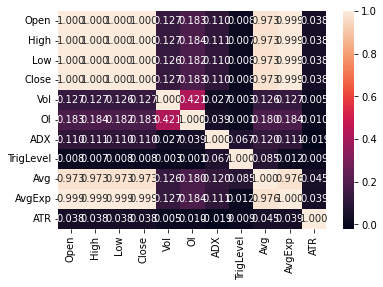

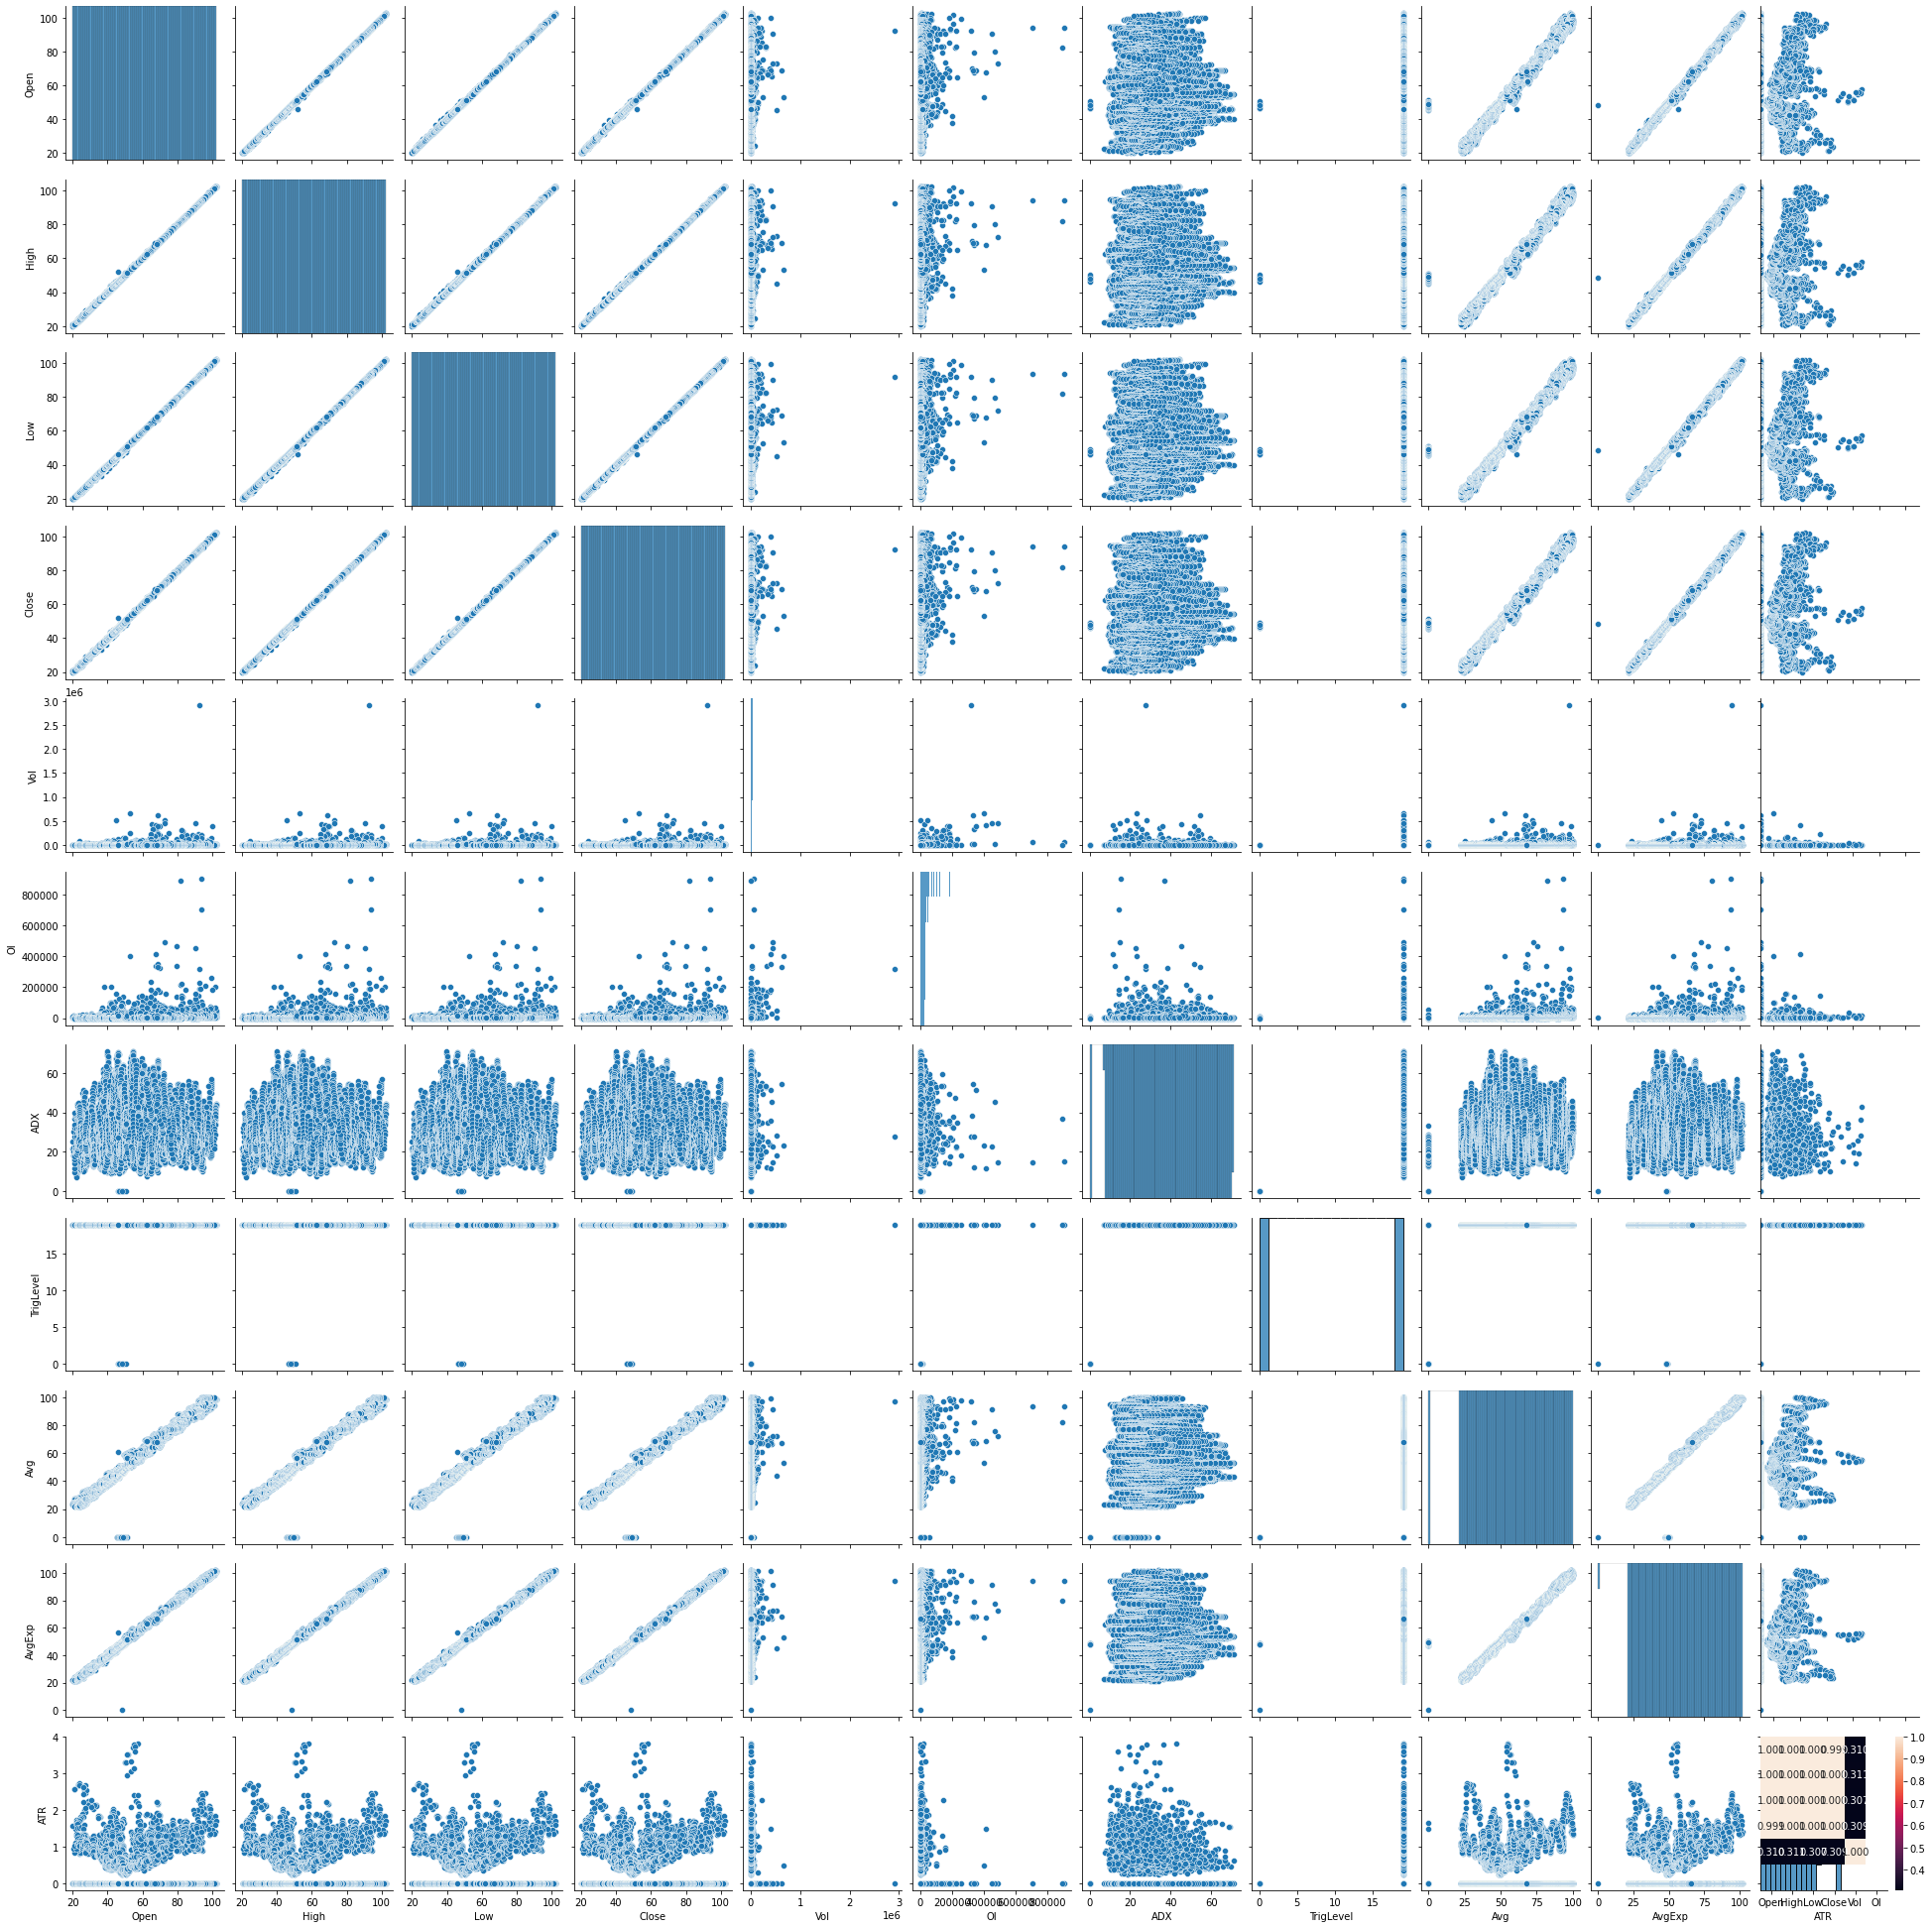

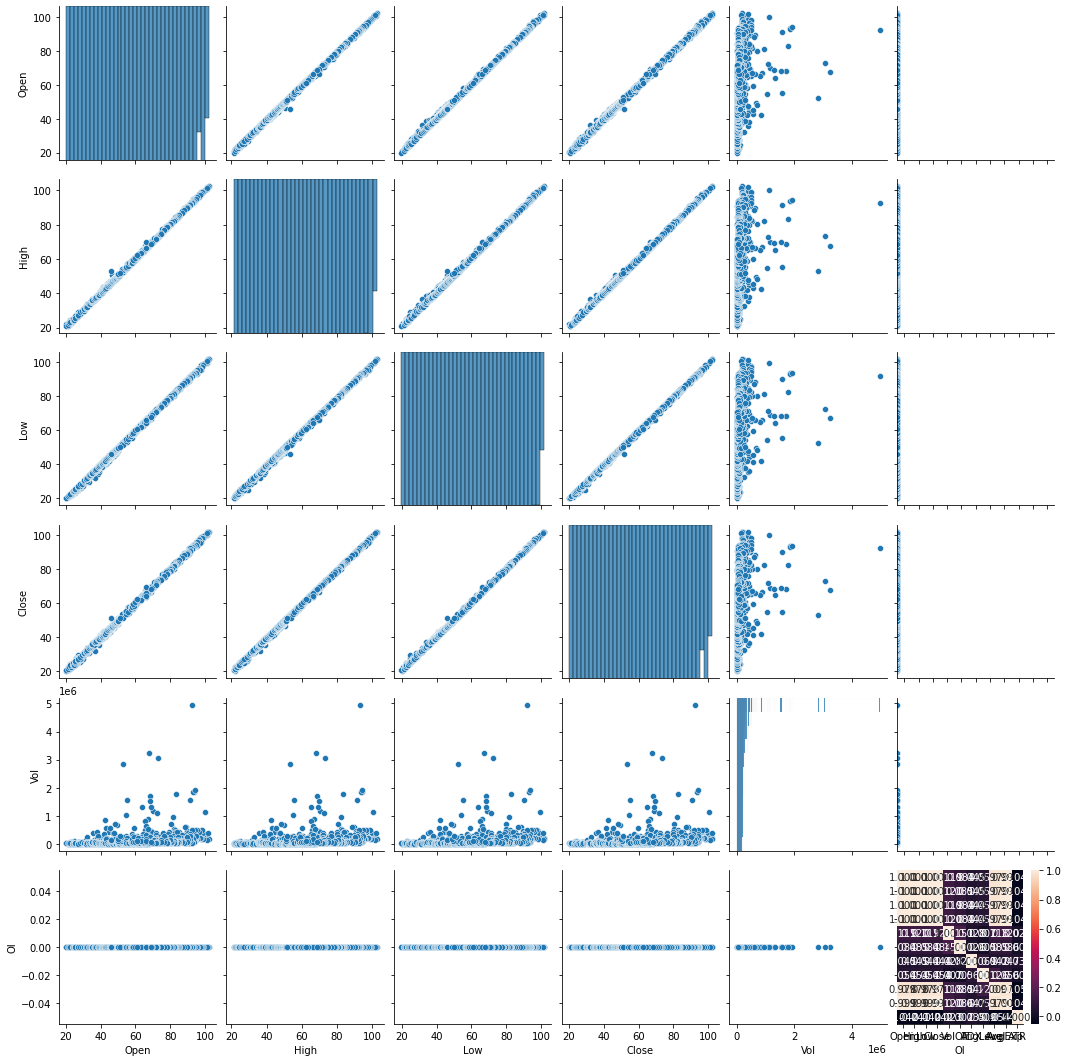

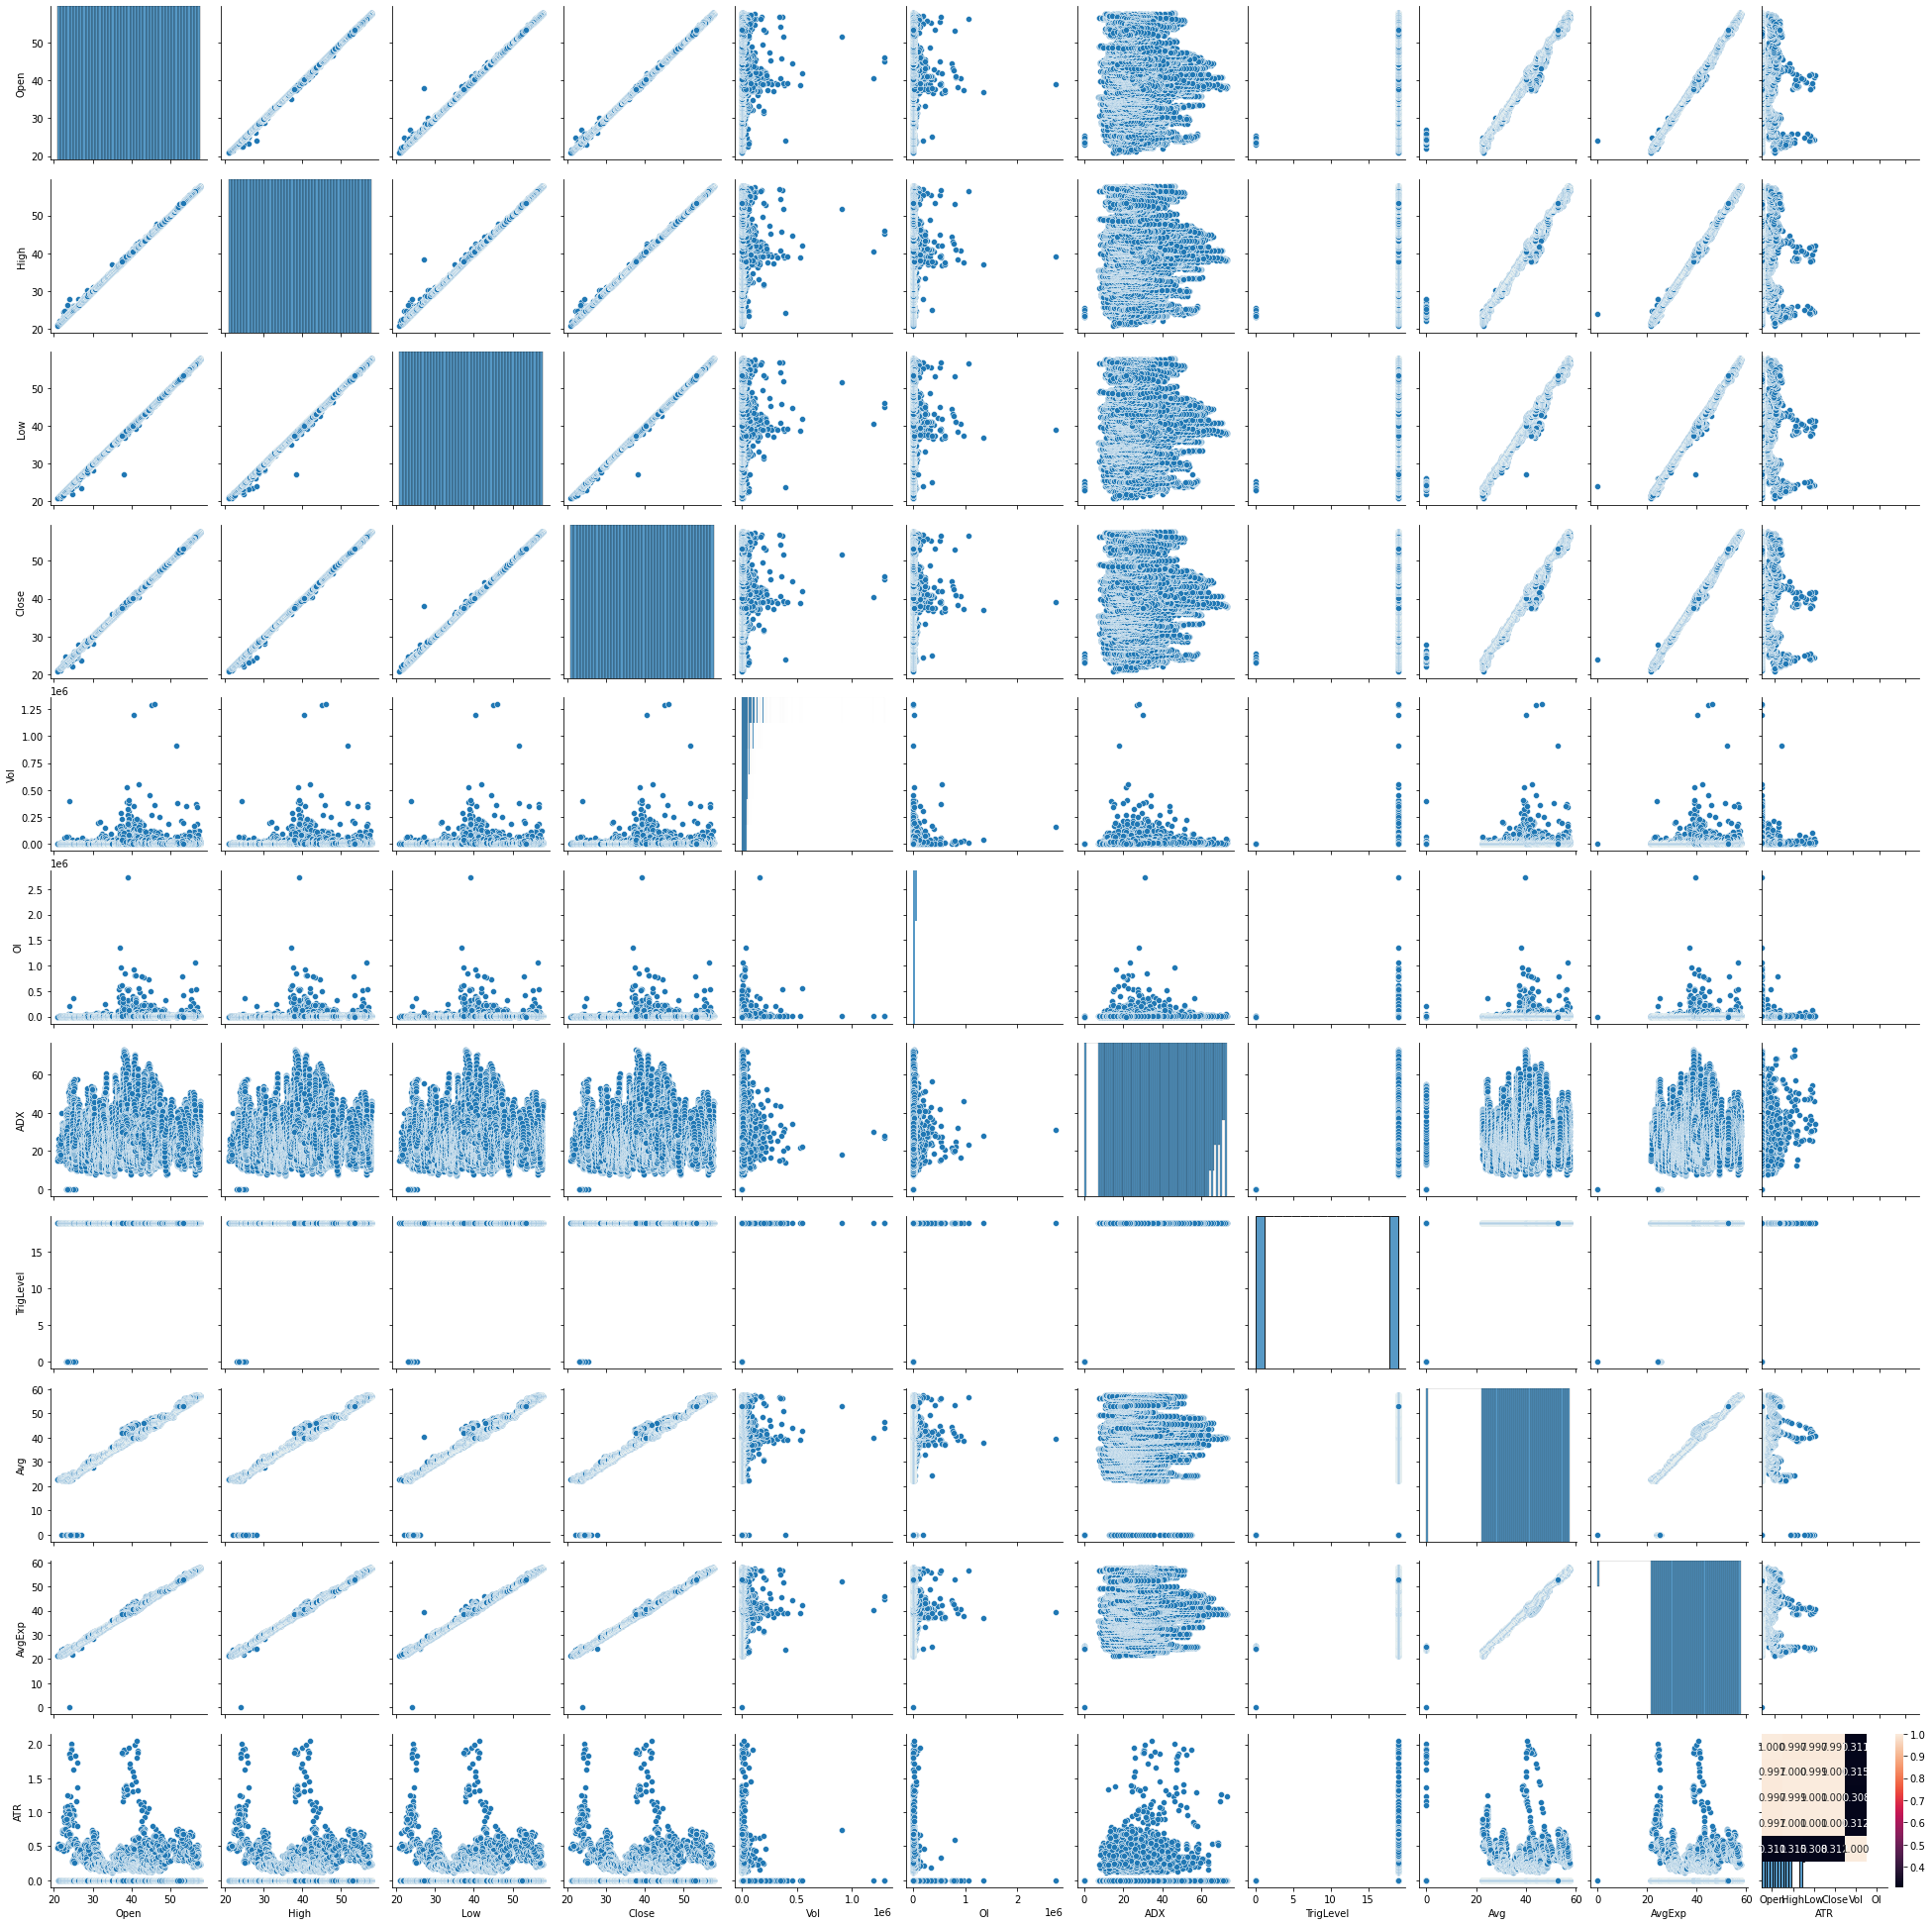

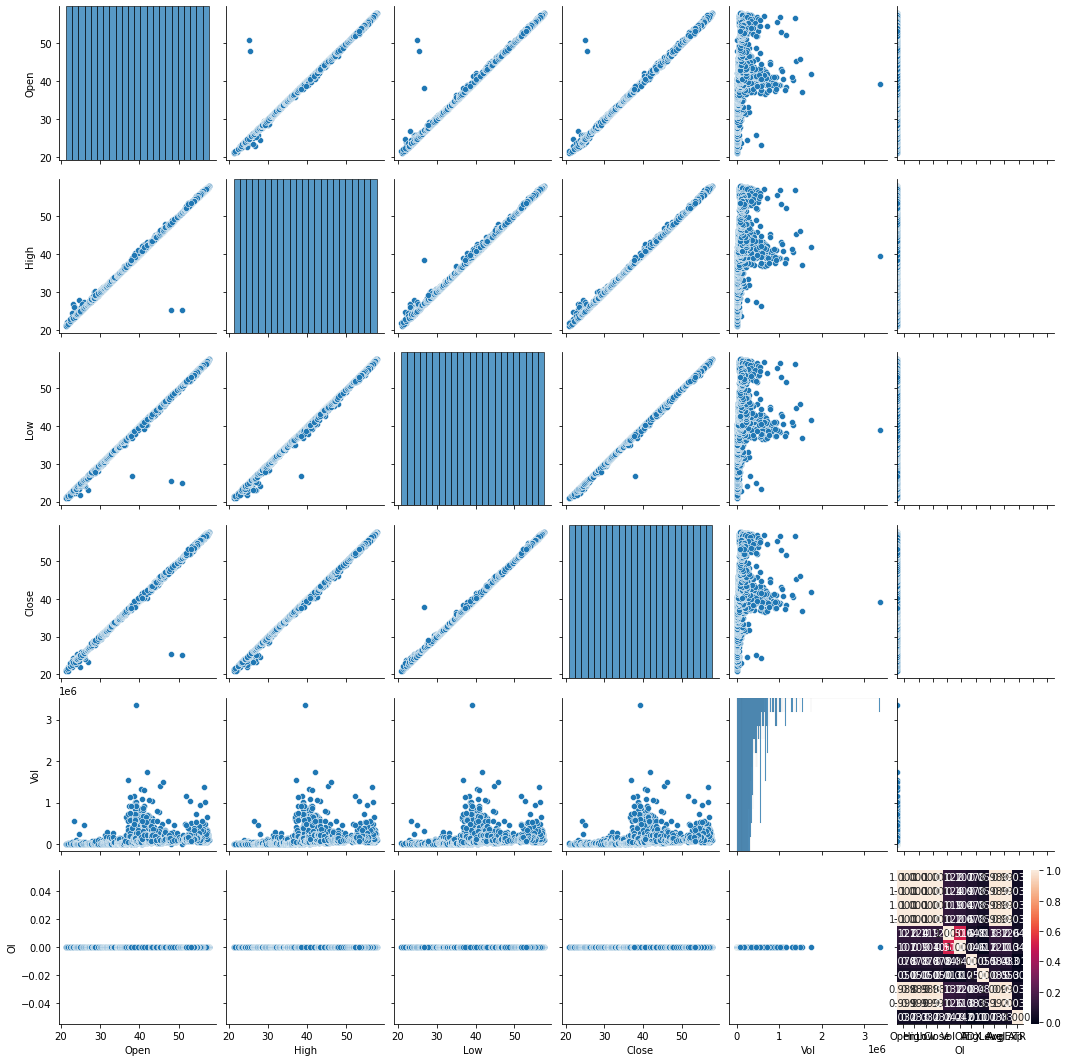

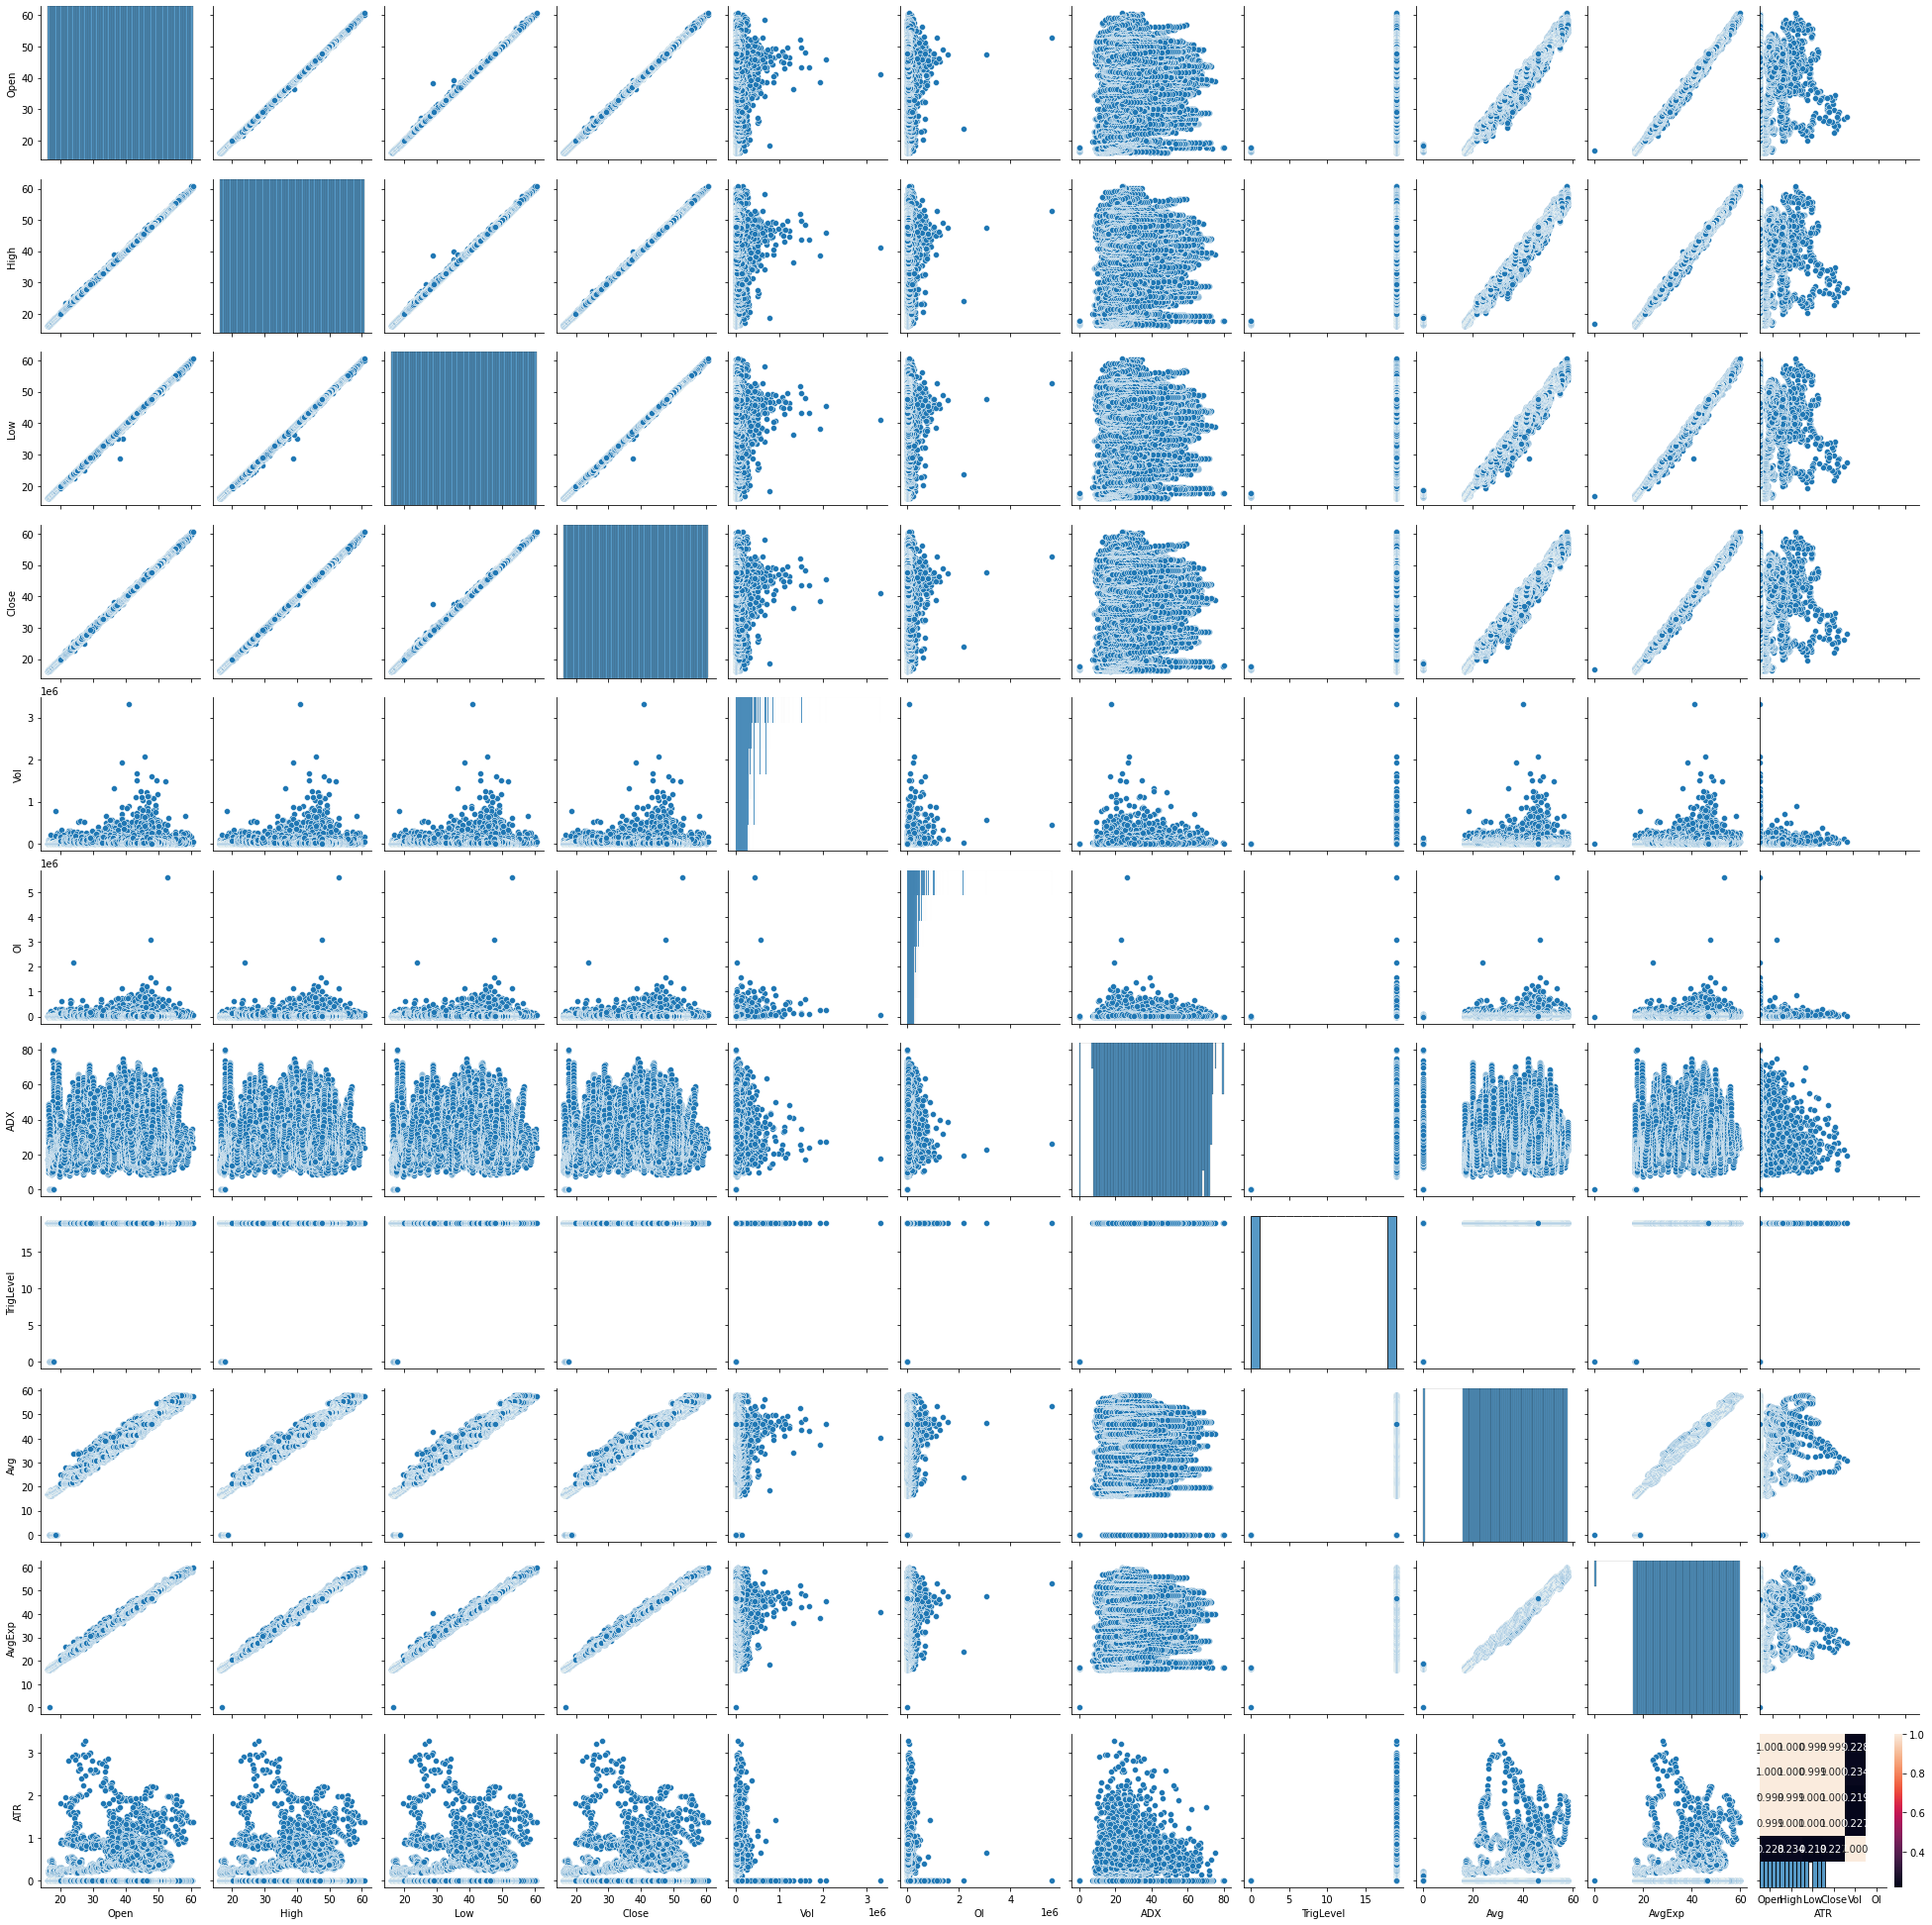

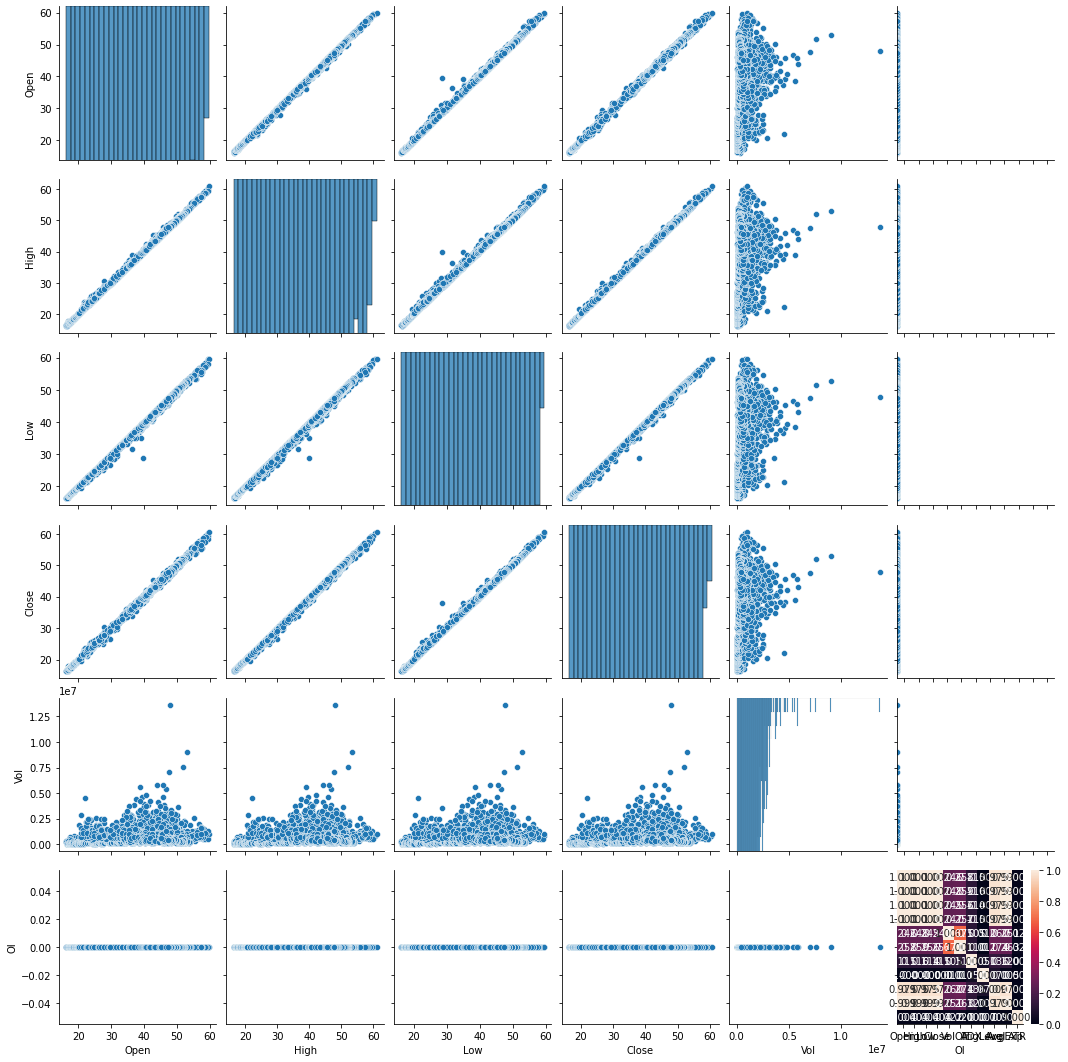

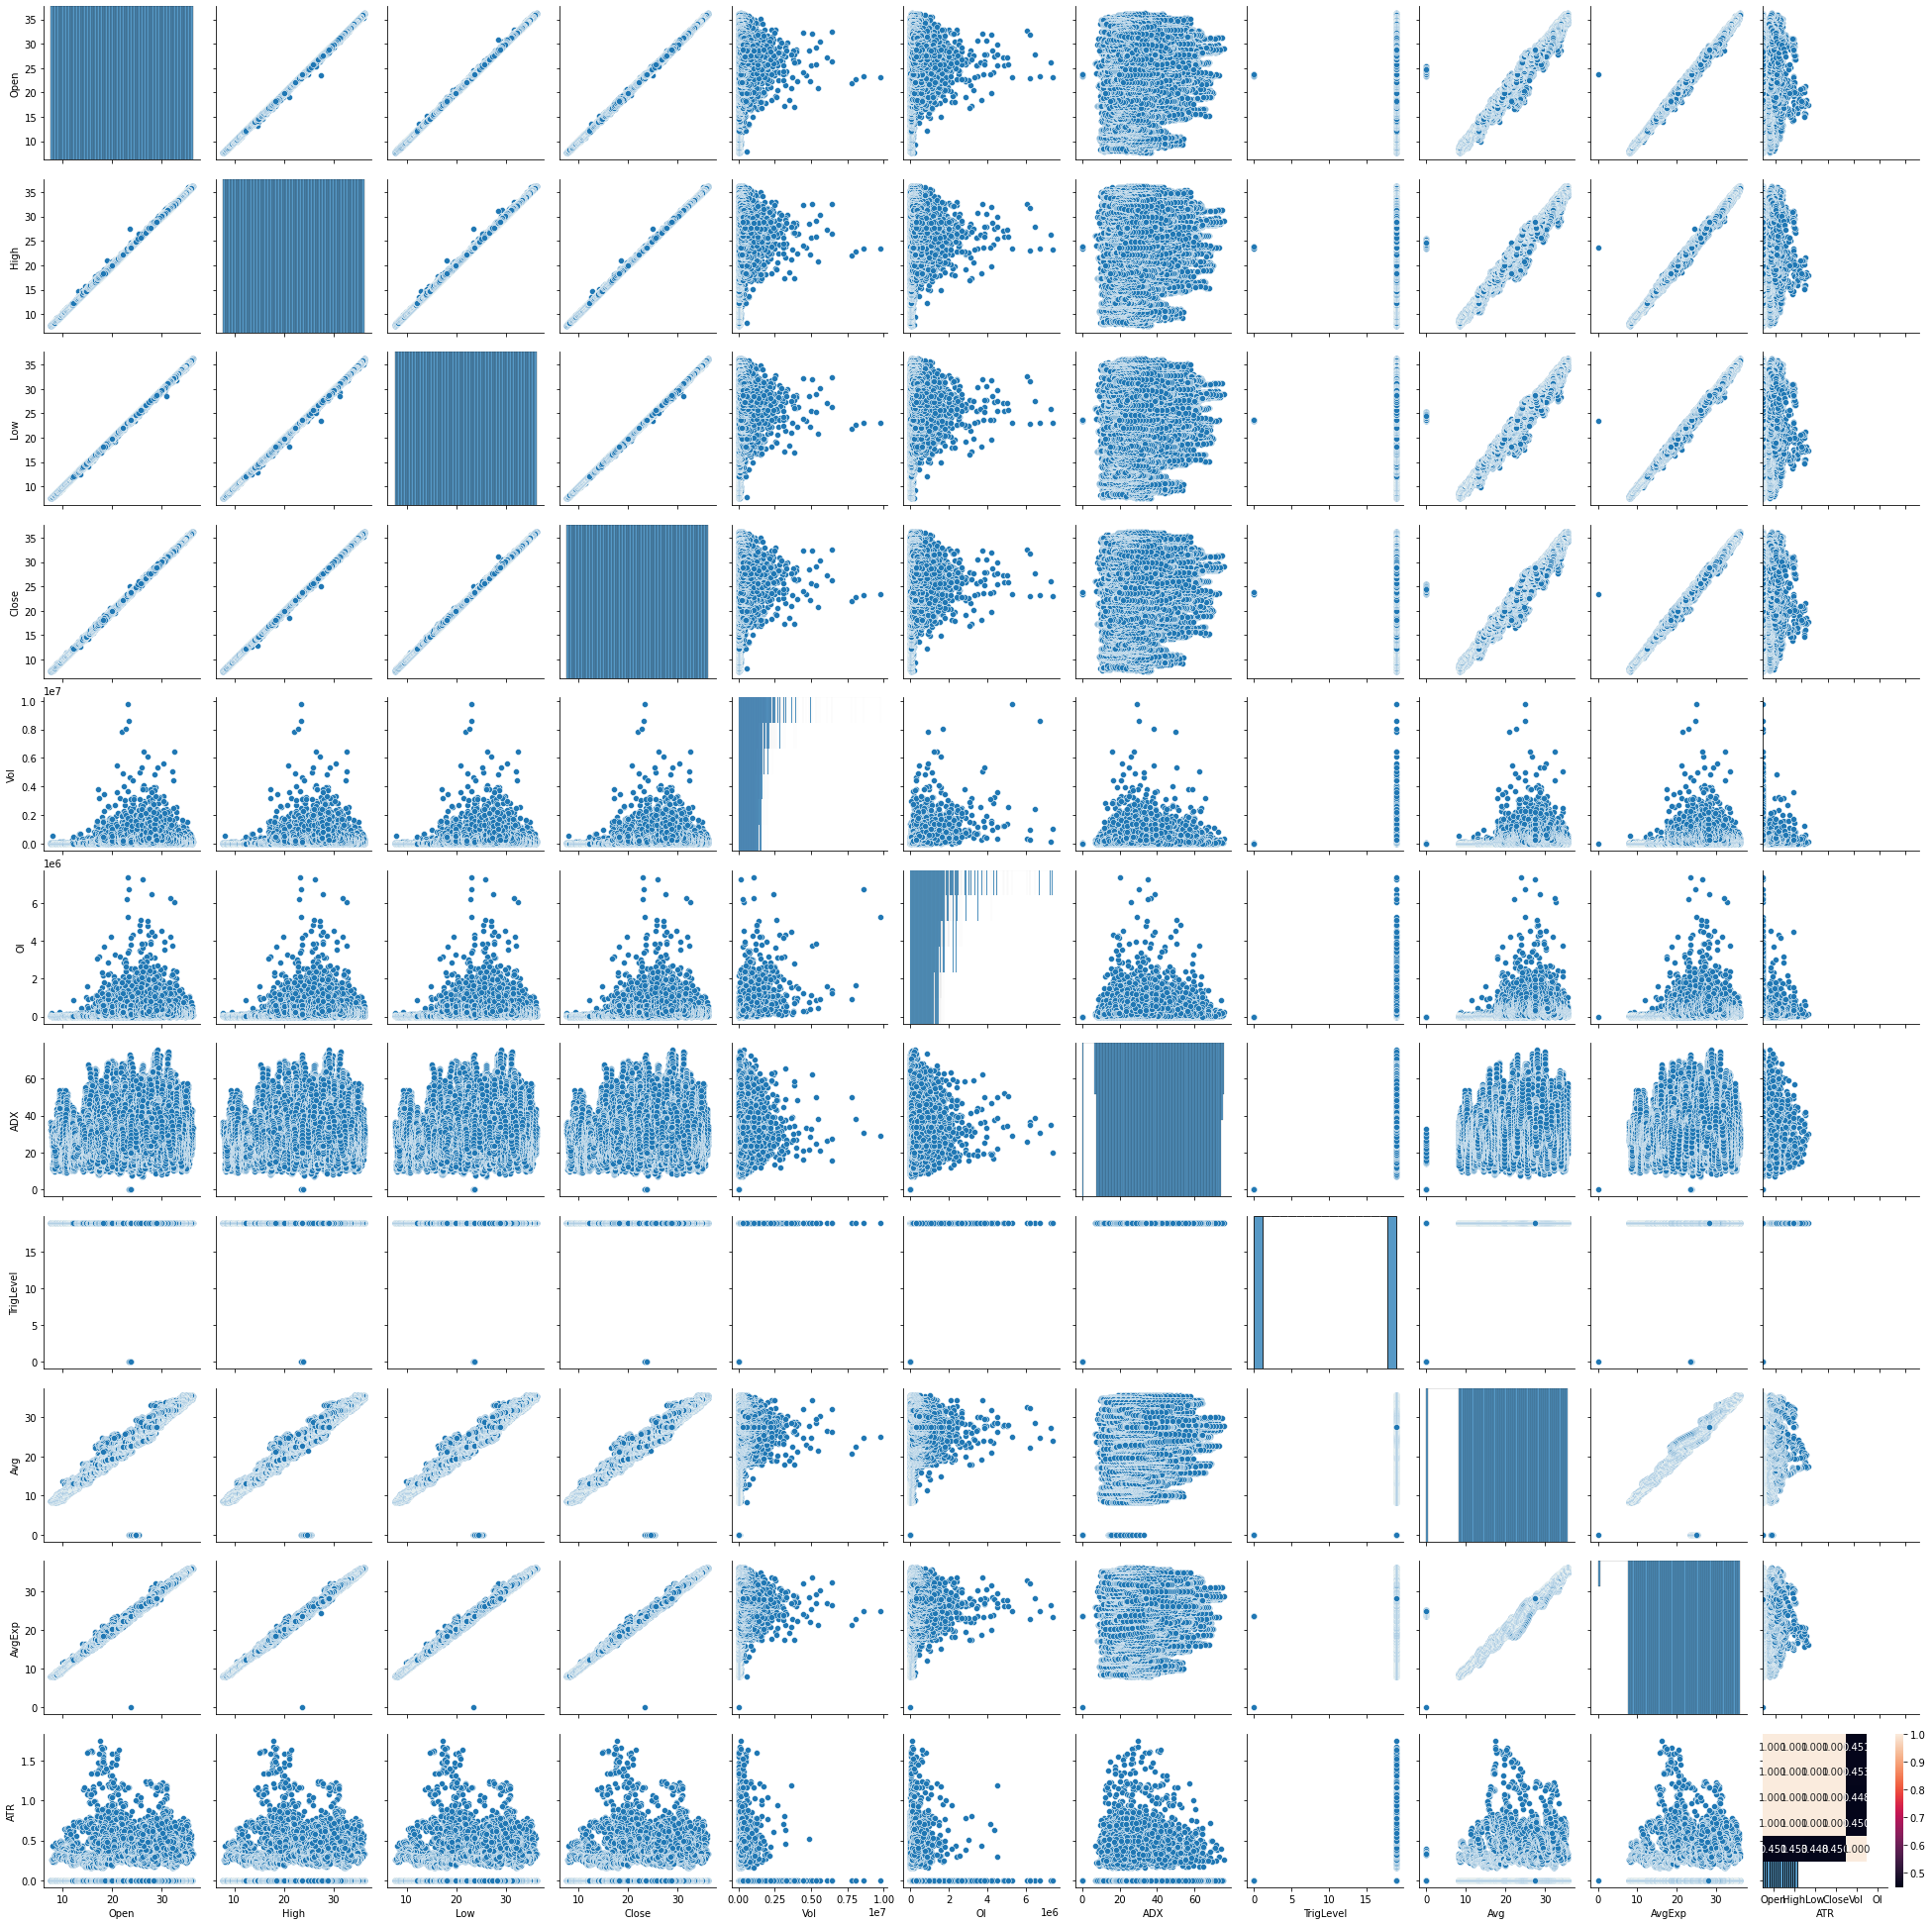

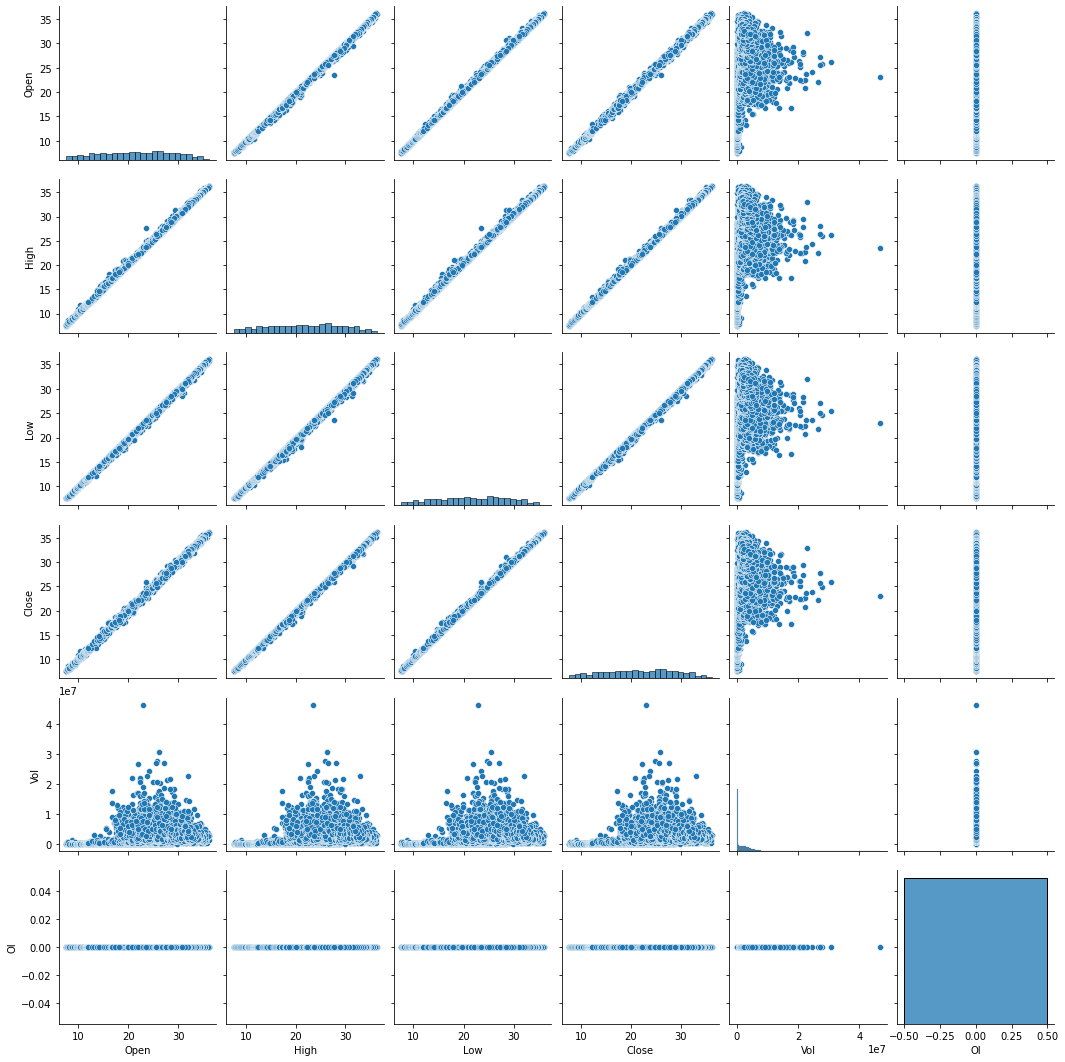

In [5]:
for i in df_list:
    corr_matrix = i.corr()
    print(i.dfname)
    #Using heatmap to visualize the correlation matrix
    sn.heatmap(corr_matrix, annot=True, fmt=".3f")
    print('\n')
    sn.pairplot(i)

In [6]:
for i in df_list:
    if(i.dfname.endswith('daily')):
        fig = go.Figure(data=[go.Candlestick(x=i.index,
                        open=i.Open,
                        high=i.High ,
                        low=i.Low,
                        close=i.Close)])
        fig.show()

In [7]:
train_X_list=[]
test_X_list=[]
train_y_list=[]
test_y_list=[]
for i in df_list:
    for j in range(4):
        '''
        print(i.drop(i.columns[j+2], axis=1))
        print(i.columns[j+2])
        '''
        
        X = i.drop(i.columns[j], axis=1).values
        y = i.iloc[:,j].values

        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 100)
        train_X_list.append(X_train)
        test_X_list.append(X_test)
        train_y_list.append(y_train)
        test_y_list.append(y_test)

In [30]:
scaled_train_X=[]
scaled_test_X=[]
for i in train_X_list:
    sc = MinMaxScaler(feature_range = (0, 1))
    training_scaled = sc.fit_transform(i)
    scaled_train_X.append(training_scaled)

for j in test_X_list:
    sc = MinMaxScaler(feature_range = (0, 1))
    training_scaled = sc.fit_transform(j)
    scaled_test_X.append(training_scaled)

In [34]:
print(scaled_train_X[0].shape)
print(scaled_test_X[0].shape)
print(test_X_list[0].shape)

(16804, 10)
(7202, 10)
(7202, 10)


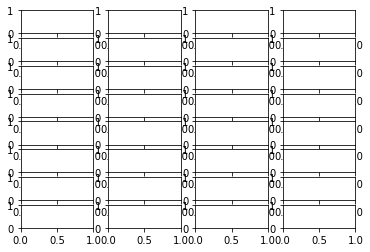

In [10]:
figure, axis = plt.subplots(8, 4)

In [39]:
#os.chdir(r'./models/')
model_names_list = []
counter = 0
for b in range(4):
    for i in range(8):
        predicted_price = 'predicted_price_'+str(i)
        model_name = 'model_'+str(df_list[i].dfname)+'_'+str(b)
        model_names_list.append(model_name)
        print(model_name)
        globals()[model_name] = Sequential()
        globals()[model_name].add(LSTM(units = 50, return_sequences = True, input_shape = (scaled_train_X[counter].shape[1], 1)))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(LSTM(units = 50, return_sequences = True))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(LSTM(units = 50, return_sequences = True))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(LSTM(units = 50))
        globals()[model_name].add(Dropout(0.2))
        globals()[model_name].add(Dense(units = 1))
        globals()[model_name].compile(optimizer = 'adam', loss = 'mean_squared_error')
        globals()[model_name].fit(scaled_train_X[counter], train_y_list[counter], epochs = 100, batch_size = 32)
        globals()[model_name].save(model_name)
        counter+=1

model_AIA_60_min_0
Epoch 1/100
526/526 [==============================] - 13s 16ms/step - loss: 1302.4971
Epoch 2/100
526/526 [==============================] - 8s 15ms/step - loss: 413.6761
Epoch 3/100
526/526 [==============================] - 8s 15ms/step - loss: 254.3182
Epoch 4/100
526/526 [==============================] - 9s 17ms/step - loss: 238.0132
Epoch 5/100
526/526 [==============================] - 9s 17ms/step - loss: 228.6770
Epoch 6/100
526/526 [==============================] - 9s 18ms/step - loss: 93.8514
Epoch 7/100
526/526 [==============================] - 9s 17ms/step - loss: 49.1448
Epoch 8/100
526/526 [==============================] - 9s 17ms/step - loss: 32.3803
Epoch 9/100
526/526 [==============================] - 9s 17ms/step - loss: 23.9223
Epoch 10/100
526/526 [==============================] - 8s 16ms/step - loss: 20.4651
Epoch 11/100
526/526 [==============================] - 8s 16ms/step - loss: 17.4044
Epoch 12/100
526/526 [==========================

### Use the models created to predict

In [35]:
counter = 0
for i in os.listdir(r'./models'):
    print(str(r'./models/'+i))
    model = keras.models.load_model(r'./models/'+i)
    print(model.name)
    predicted_price = model.predict(test_X_list[counter])
    counter+=1
    df_list[counter]['predicted'] = predicted_price
    df_list[counter]

FileNotFoundError: [WinError 3] The system cannot find the path specified: './models'

In [37]:
counter = 0
for i in os.listdir():
    print(str(r''+i))
    model = keras.models.load_model(i)
    print(model.name)
    predicted_price = model.predict(test_X_list[counter])
    counter+=1
    df_list[counter]['predicted'] = predicted_price
    df_list[counter]

model_60_min_0


AttributeError: '_UserObject' object has no attribute 'name'

In [19]:
os.chdir(r'./models/')

In [29]:
model = keras.models.load_model('model_60_min_0')
print(model.name)
predicted_price = model.predict(test_X_list[0])
predicted_price = np.testing.assert_allclose(model.predict(test_X_list[0]))
df_list[0]['predicted'] = predicted_price


Exception ignored in: <function UniquePtr.__del__ at 0x000001CCBD68A200>
Traceback (most recent call last):
  File "c:\Users\flago\AppData\Local\Programs\Python\Python310\lib\site-packages\tensorflow\python\framework\c_api_util.py", line 71, in __del__
    obj = self._obj
AttributeError: 'ScopedTFGraph' object has no attribute '_obj'


AttributeError: '_UserObject' object has no attribute 'predict'

In [ ]:
type(model)

AttributeError: '_UserObject' object has no attribute 'dir'

In [13]:
#model.name
predicted_price.shape
#for i in df_list:
#    print(i.dfname)

NameError: name 'predicted_price' is not defined

### Plot the predictions

In [ ]:
plt.plot(df.loc[800:, 'Date'],data_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [25]:
model_name_list_aux = os.listdir()
model_name_list_aux

['model_60_min_0',
 'model_60_min_1',
 'model_60_min_2',
 'model_AIA_60_min_3',
 'model_AIA_daily_0',
 'model_AIA_daily_1',
 'model_AIA_daily_2',
 'model_AIA_daily_3',
 'model_AOR_60_min_0',
 'model_AOR_60_min_1',
 'model_AOR_60_min_2',
 'model_AOR_60_min_3',
 'model_AOR_daily_0',
 'model_AOR_daily_1',
 'model_AOR_daily_2',
 'model_AOR_daily_3',
 'model_EPP_60_daily_0',
 'model_EPP_60_daily_1',
 'model_EPP_60_daily_2',
 'model_EPP_60_daily_3',
 'model_EPP_60_min_0',
 'model_EPP_60_min_1',
 'model_EPP_60_min_2',
 'model_EPP_60_min_3',
 'model_EWG_60_min_0',
 'model_EWG_60_min_1',
 'model_EWG_60_min_2',
 'model_EWG_60_min_3',
 'model_EWG_daily_0',
 'model_EWG_daily_1',
 'model_EWG_daily_2',
 'model_EWG_daily_3']

In [ ]:
for i in range(8):
    for j in range(4):
        